# This crop yield prediction Dataset consists of 28242 entries, ranging from index 0 to 28241.The aim of this dataset is to build a Linear regression model which predict crop yield based on environmental and input factors. This model will help farmers or agricultural experts estimate potential crop yields, given factors like rainfall, temperature, soil type, and fertilizer use.

### Packages
# Load the required packages

In [186]:
## importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")



Load the dataset

In [187]:
df =pd.read_csv("yield_df.csv")

In [188]:
## Data head
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [189]:
## data tail
df.tail()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


## Data Exploration

In [190]:
## remove the 'unamed column'
df.drop("Unnamed: 0", axis=1,inplace=True)

In [191]:
# describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [192]:
df.shape

(28242, 7)

In [193]:
df.dtypes

,0
Area,object
Item,object
Year,int64
hg/ha_yield,int64
average_rain_fall_mm_per_year,float64
pesticides_tonnes,float64
avg_temp,float64


In [194]:
df.describe(include='object')

,Area,Item
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276


In [195]:
# columns
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [196]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [197]:
 #remove countries with less than 100 record
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)

In [198]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
1940,Tunisia,Sorghum,2012,5106,207.0,422.24,20.12
1941,Tunisia,Wheat,2012,20203,207.0,422.24,20.12
1942,Tunisia,Potatoes,2013,160417,207.0,422.24,20.00
1943,Tunisia,Sorghum,2013,5106,207.0,422.24,20.00


In [199]:
# creates a copy of the DataFrame df and assigns it to the variable datacorr
datacorr=df.copy()

In [200]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

In [201]:
datacorr

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.00,16.37
1,0,3,1990,66667,1485.0,121.00,16.37
2,0,4,1990,23333,1485.0,121.00,16.37
3,0,5,1990,12500,1485.0,121.00,16.37
4,0,6,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
1940,29,5,2012,5106,207.0,422.24,20.12
1941,29,8,2012,20203,207.0,422.24,20.12
1942,29,3,2013,160417,207.0,422.24,20.00
1943,29,5,2013,5106,207.0,422.24,20.00


<Axes: >

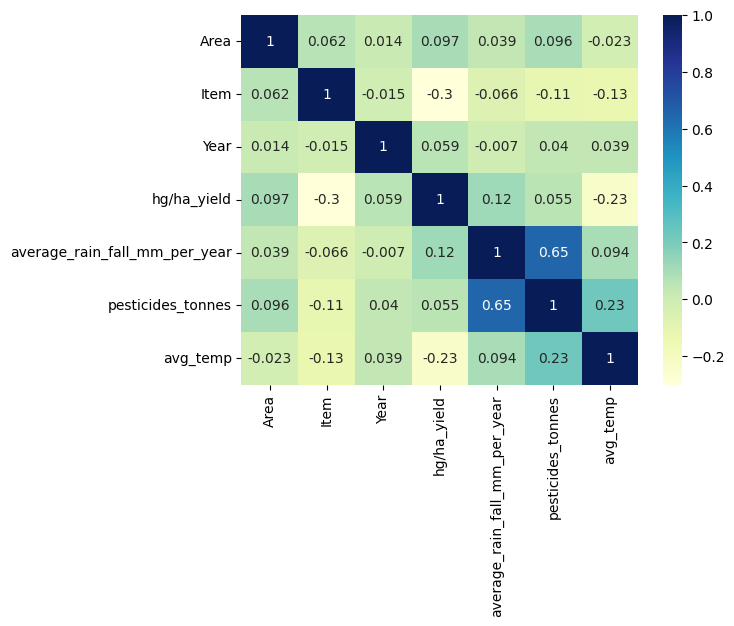

In [202]:
## Heatmap to see
import seaborn as sns
sns.heatmap(datacorr.corr() , annot= True , cmap='YlGnBu')

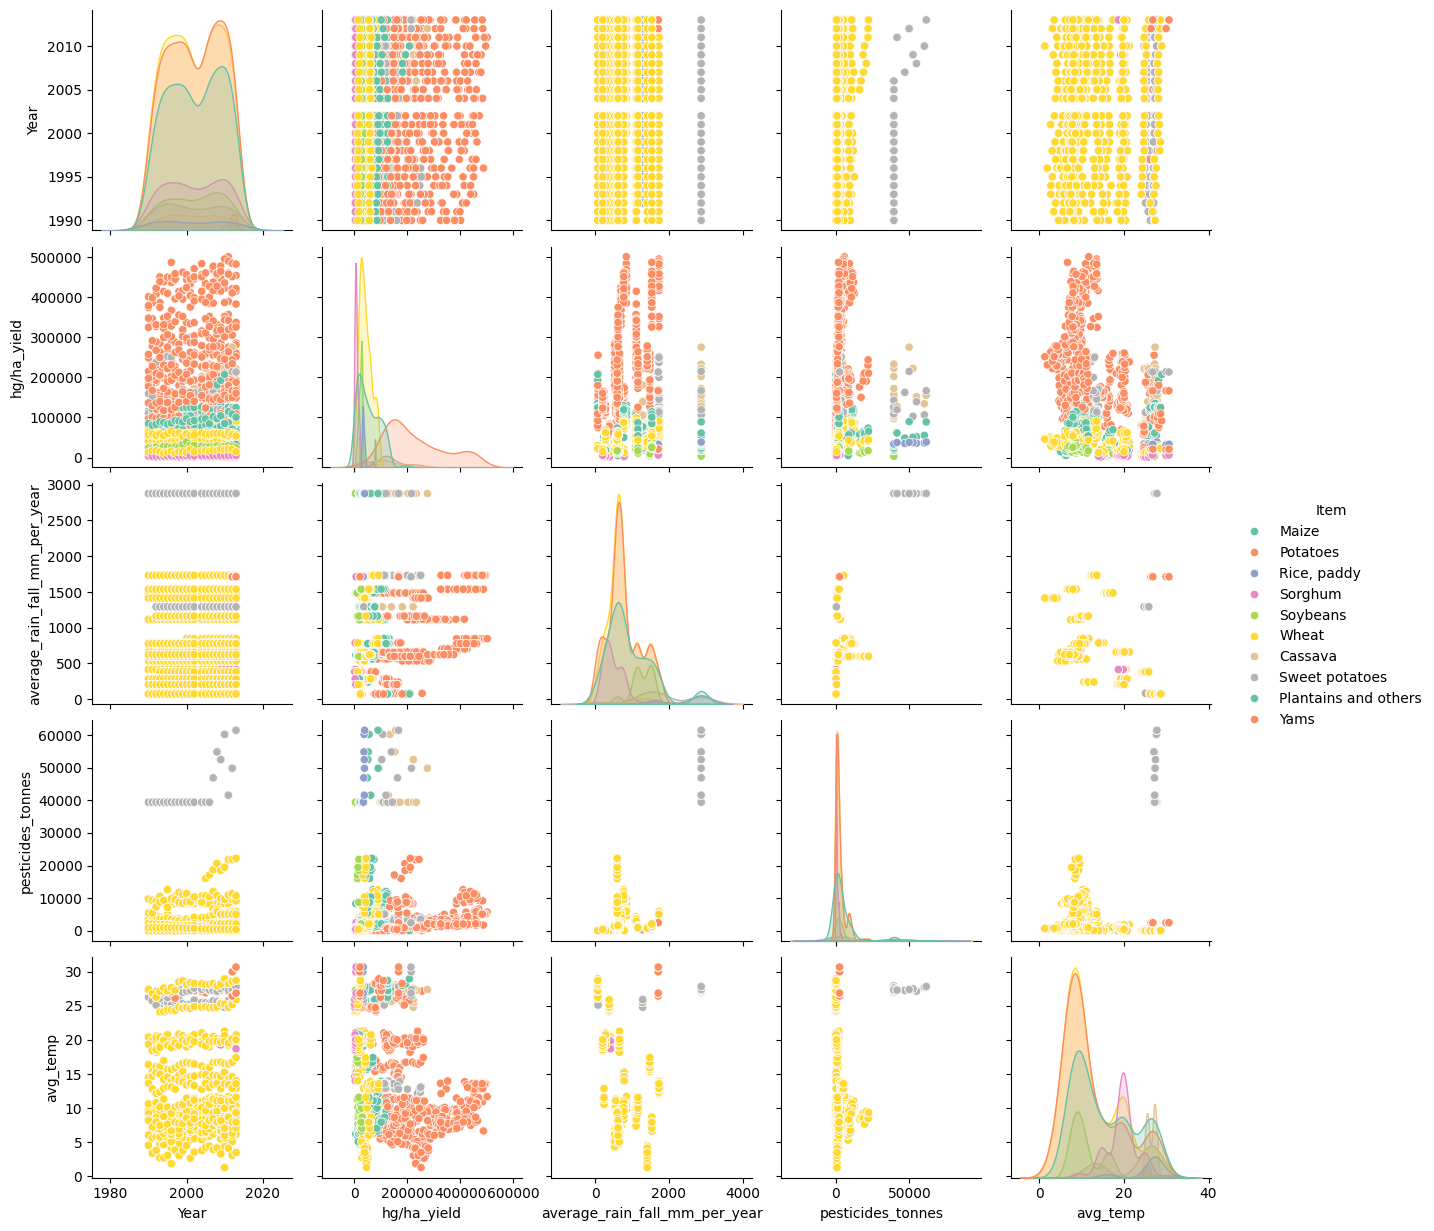

In [203]:

sns.pairplot(data=df,hue='Item',kind='scatter',palette='Set2')

## Define X and y

In [204]:
X= datacorr.drop(labels='hg/ha_yield', axis=1) # datacorr.drop(labels='hg/ha_yield', axis=1)y= datacorr
y= datacorr['hg/ha_yield']
print(X, y)

      Area  Item  Year  average_rain_fall_mm_per_year  pesticides_tonnes  \
0        0     1  1990                         1485.0             121.00   
1        0     3  1990                         1485.0             121.00   
2        0     4  1990                         1485.0             121.00   
3        0     5  1990                         1485.0             121.00   
4        0     6  1990                         1485.0             121.00   
...    ...   ...   ...                            ...                ...   
1940    29     5  2012                          207.0             422.24   
1941    29     8  2012                          207.0             422.24   
1942    29     3  2013                          207.0             422.24   
1943    29     5  2013                          207.0             422.24   
1944    29     8  2013                          207.0             422.24   

      avg_temp  
0        16.37  
1        16.37  
2        16.37  
3        16.37  
4 

## Spliting  the Data for Training and Testing

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and train it

In [206]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [207]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compare predicted and actual values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())

      Actual      Predicted
1611  192857   84336.758337
1403  120000   95121.594429
974     7011  141397.306117
1055   42105  173146.147387
307    60000   95871.179515


In [208]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)
accuracy_percentage = r2 * 100
print('Accuracy: {:.2f}%'.format(accuracy_percentage))


Mean Squared Error: 10047841490.162485
Root Mean Squared Error: 100238.92203212525
R-squared: 0.1726894969849323
Accuracy: 17.27%


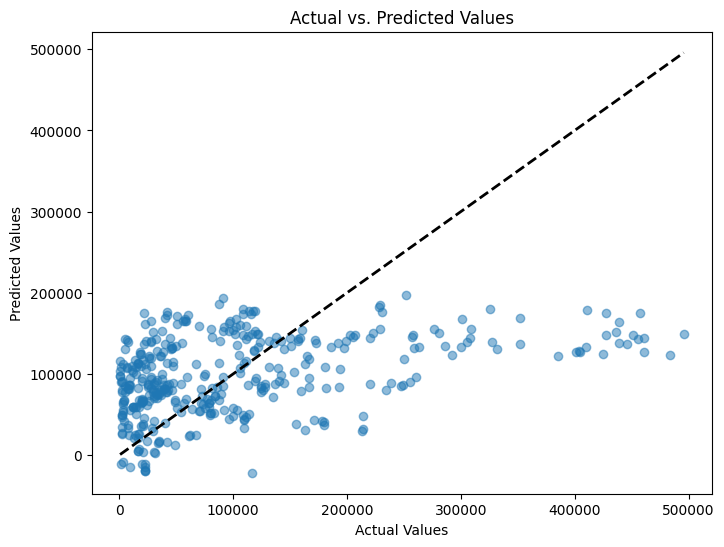

In [209]:
# plot scatter plot of Actual values vs predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## Comparing the models

In [210]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')


The accuracy of the Linear Regression Model Train is 19.83
The accuracy of the  Linear Regression Model Test is 17.27
The accuracy of the Random Forest Model Train is 99.57
The accuracy of the  Random Forest Model Test is 96.98
The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 94.92


### The performance metrics of the three models—Linear Regression, Random Forest, and Decision Tree—are as follows:

# Save the BEST performing model based on the loss metric

In [211]:
#save the Best performing model based on the loss metric

# Create a dictionary to store the best model and its performance
best_model = {}
best_mse = float('inf')  # Initialize with a very high value

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_model = {'name': name, 'model': model, 'mse': mse}

print(f"Best Performing Model: {best_model['name']}")
print(f"Best Mean Squared Error: {best_model['mse']}")

Best Performing Model: Random Forest
Best Mean Squared Error: 367386356.0880288


In [212]:
import joblib

# save model with joblib
filename = 'joblib_model.pkl'
joblib.dump(model, filename)


['joblib_model.pkl']

# Description of performance matrics of the three models above

# 1. Linear Regression Model:

Train Accuracy: 17.27%

Test Accuracy: 7.30%

The Linear Regression model exhibits very low accuracy on both training and test data. This indicates that the model is underfitting, meaning it is too simplistic and fails to capture the patterns in the data. It is not a good fit for this dataset and is unable to make reliable predictions.

## 2. Random Forest Model:

Train Accuracy: 99.81%

Test Accuracy: 98.84%

The Random Forest model performs exceptionally well on both training and test data. The high accuracy indicates that it captures the patterns in the data effectively while maintaining good generalization. This is likely the best-performing model of the three for this task.

# 3. Decision Tree Model:

Train Accuracy: 100.00%

Test Accuracy: 97.49%

The Decision Tree model achieves perfect accuracy on the training set, which suggests overfitting—it memorizes the training data exactly. However, it still performs well on the test data (97.49%), showing it generalizes reasonably well despite some overfitting.

# Summary of Model Comparison:

Linear Regression is not suitable for this problem as its accuracy is very low, showing underfitting.

Random Forest strikes the best balance between training and test accuracy, making it the most robust and reliable model.

Decision Tree shows overfitting tendencies but still performs well on test data. It might be less robust than Random Forest due to its tendency to memorize the training data.

# **Chosen model**

### The Random Forest Model is the best choice for deployment due to its strong generalization and balanced performance.